# Star PSF and 3D plot


이 자료는 천체 관측 자료인 FITS 파일을 열어 star profile을 확인해 보는 방법을 설명합니다.

## 데이터 저장

### 데이터 저장 폴더 생성

데이터를 저장할 폴더를 "GSHS_Photometry" 라는 이름으로 생성해 보겠습니다.

* 만약 리눅스 시스템 이라면 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있습니다.
> !mkdir GSHS_Photometry

아래 코드를 실행하면 OS의 영향을 받지 않기 위하여 pathlib을 사용하여 폴더를 생성할 수 있습니다.

In [1]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "GSHS_Photometry"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
GSHS_Photometry is already exist...


### FITS 파일 다운로드

나의 구글 드라이브에 저장된 CCD 관측 파일을 다운받아 보겠습니다.

GNU Wget은 HTTP 통신 또는 FTP 통신을 사용해 서버에서 파일 또는 콘텐츠를 다운로드할 때 사용하는 소프트웨어입니다. Wget의 특징은 여러 파일을 한 번에 다운로드하거나 웹 페이지의 링크를 순회하며 여러 콘텐츠를 자동으로 다운로드할 때 매우 편리합니다.

MS Windows에서는 별도로 설치를 해줘야 하며,
구글 코랩도 wget을을 지원해주니 아래 셀을 실행하면 자신의 [작업 영역]에 저장된다. 하지만 이 파일은 이 런타임이 재실행 될때는 삭제됨에 유의하자.

아래 코드를 실행하면 여러분의 작업영역에 해당 파일을 저장할 것이다.



In [2]:
fname0 = "241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit"
fid0 = "1NhaUjTvlXLFLIAmHXZyD7jt5IcLbMySU"

fname1 = "IC2167_LIGHT_L_2023-03-18-13-02-59_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits"
fid1 = "1f8MjRz9Iak3oqd6x1VOwfjjsP3A7X0GC"

fname2 = "NGC6992_LIGHT_L_2023-06-23-15-37-09_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits"
fid2 = "1VZGvfq_nTtvXKQsYlTT1lNuRO8fvdnXv"

# wget을 이용(나의 구굴드라이브에서 공유한 파일을 구글 코랩에서 사용할 경우)
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid0}" -O {save_dir_name}/{fname0}
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid1}" -O {save_dir_name}/{fname1}
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid2}" -O {save_dir_name}/{fname2}


--2024-12-21 19:07:25--  https://docs.google.com/uc?export=download&id=1NhaUjTvlXLFLIAmHXZyD7jt5IcLbMySU
Resolving docs.google.com (docs.google.com)... 142.250.76.142, 2404:6800:400a:804::200e
Connecting to docs.google.com (docs.google.com)|142.250.76.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1NhaUjTvlXLFLIAmHXZyD7jt5IcLbMySU&export=download [following]
--2024-12-21 19:07:26--  https://drive.usercontent.google.com/download?id=1NhaUjTvlXLFLIAmHXZyD7jt5IcLbMySU&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.76.129, 2404:6800:400a:813::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.76.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16980480 (16M) [application/octet-stream]
Saving to: ‘GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit’

### 데이터 확인

OS의 영향을 받지 않고 파이썬으로 확인하는 방법은 아래와 같이 하면 됩니다.

In [3]:
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.fit*')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit'), PosixPath('GSHS_Photometry/46P-WIRTANEN_LIGHT_R_2018-12-13-17-46-15_60sec_FSQ106ED-x73_QSI683ws_-30c_2bin.fit'), PosixPath('GSHS_Photometry/IC2167_LIGHT_L_2023-03-18-13-02-59_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits'), PosixPath('GSHS_Photometry/IC434_Light_H_2019-10-08-09-38-54_900sec_GSON300_QSI683ws_-15C_1bin.fit'), PosixPath('GSHS_Photometry/M13_Light_L_2021-06-04-13-10-16_090sec_TEC140x75_STL-11000M_-19C_1bin.fit'), PosixPath('GSHS_Photometry/NGC6992_LIGHT_L_2023-06-23-15-37-09_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits')]
len(fpaths): 6


##  FITS handling

### Load files

fits file들을 모두 읽어들여 hdul라는 이름의 리스트에 저장해 놓고 사용하겠습니다.

In [4]:
from astropy.io import fits

fpath = Path(fpaths[0])
print(f"fpath: {fpath}")
print(f"type(fpath): {type(fpath)}")

hdul =  fits.open(str(fpath), unit="adu")
print("type(hdul) :", type(hdul))
print("type(hdul[0]) :", type(hdul[0]))

fpath: GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit
type(fpath): <class 'pathlib.PosixPath'>
type(hdul) : <class 'astropy.io.fits.hdu.hdulist.HDUList'>
type(hdul[0]) : <class 'astropy.io.fits.hdu.image.PrimaryHDU'>


### header

hdul라는 이름에 HDUList들이 리스트 형태로 들어 있습니다. 각각의 hdulist는 2차원 이므로 index는 [0]번만 존재합니다.

In [5]:
print("type(hdul[0].hedaer) :", type(hdul[0].header))
hdul[0].header

type(hdul[0].hedaer) : <class 'astropy.io.fits.header.Header'>


SIMPLE  =                    T / C# FITS                                        
BITPIX  =                   16                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 3352                                                  
NAXIS2  =                 2532                                                  
EXTEND  =                    T / Extensions are permitted                       
BZERO   =                32768                                                  
IMAGETYP= 'LIGHT'              / Type of exposure                               
EXPOSURE=                150.0 / [s] Exposure duration                          
EXPTIME =                150.0 / [s] Exposure duration                          
DATE-LOC= '2023-11-08T03:38:15.165' / Time of observation (local)               
DATE-OBS= '2023-11-07T18:38:15.165' / Time of observation (UTC)                 
DATE-AVG= '2023-11-07T18:39:

header는 key와 value가 들어 있습니다.

In [6]:
print("hdul[0].hedaer['DATE-OBS'] :", hdul[0].header['DATE-OBS'])
print("type(hdul[0].hedaer['DATE-OBS']) :", type(hdul[0].header['DATE-OBS']))

hdul[0].hedaer['DATE-OBS'] : 2023-11-07T18:38:15.165
type(hdul[0].hedaer['DATE-OBS']) : <class 'str'>


### data

관측 자료는 numpy.ndarray 형태로 들어 있음을 알 수 있습니다.

In [7]:
print("type(hdul[0].data) :", type(hdul[0].data))
print("hdul[0].data.dtype :", hdul[0].data.dtype)
print("hdul[0].data.shape :", hdul[0].data.shape)
print("hdul[0].data :", hdul[0].data)

type(hdul[0].data) : <class 'numpy.ndarray'>
hdul[0].data.dtype : uint16
hdul[0].data.shape : (2532, 3352)
hdul[0].data : [[5860 5936 6088 ... 6071 5860 5829]
 [5787 6202 6235 ... 5992 6024 5822]
 [5882 6058 6419 ... 5900 6181 5803]
 ...
 [5799 6321 6164 ... 6263 6019 6345]
 [5794 6019 5962 ... 6270 6538 6224]
 [5779 6066 6155 ... 6215 5985 6219]]


## Display FITS file

matplotlib을 이용하면 numpy.ndarray를 화면에 디스플레이할 수 있습니다.

### zimshow 함수

image normalize를 사용하여 zimshow 함수를 정의하여 사용하겠습니다.  

In [8]:
from warnings import warn
from astropy.visualization import (
    ImageNormalize,
    LinearStretch,
    ZScaleInterval,
    simple_norm,
)

def znorm(image, stretch=LinearStretch(), **kwargs):
    return ImageNormalize(image, interval=ZScaleInterval(**kwargs), stretch=stretch)

def zimshow(
    ax,
    image,
    stretch=LinearStretch(),
    cmap=None,
    origin="lower",
    zscale_kw={},
    **kwargs
):
    im = ax.imshow(
        image,
        norm=znorm(image, stretch=stretch, **zscale_kw),
        origin=origin,
        cmap=cmap,
        **kwargs
    )
    return im

def norm_imshow(
    ax,
    data,
    origin="lower",
    stretch="linear",
    power=1.0,
    asinh_a=0.1,
    min_cut=None,
    max_cut=None,
    min_percent=None,
    max_percent=None,
    percent=None,
    clip=True,
    log_a=1000,
    invalid=-1.0,
    zscale=False,
    vmin=None,
    vmax=None,
    **kwargs
):
    """Do normalization and do imshow"""
    if vmin is not None and min_cut is not None:
        warn("vmin will override min_cut.")

    if vmax is not None and max_cut is not None:
        warn("vmax will override max_cut.")

    if zscale:
        zs = ImageNormalize(data, interval=ZScaleInterval())
        min_cut = vmin = zs.vmin
        max_cut = vmax = zs.vmax

    if vmin is not None or vmax is not None:
        im = ax.imshow(data, origin=origin, vmin=vmin, vmax=vmax, **kwargs)
    else:
        im = ax.imshow(
            data,
            origin=origin,
            norm=simple_norm(
                data=data,
                stretch=stretch,
                power=power,
                asinh_a=asinh_a,
                min_cut=min_cut,
                max_cut=max_cut,
                min_percent=min_percent,
                max_percent=max_percent,
                percent=percent,
                clip=clip,
                log_a=log_a,
                invalid=invalid
            ),
            **kwargs)
    return im


# def phot_infoplot()

### Star profile 확인하기

Star profile을 확인하기 위해서는 별을 좀 확대해서 display할 필요가 있습니다.

matplotlib에서 2개 이상의 그래프를 동시에 그리는 방법은 여러가지가 있는데, 아래는 그중 하나의 예시입니다. Cutout2D 함수를 이용하여 원하는 픽셀 크기를 2차원으로 잘라서 display 할 수 있는데, 별이 있는 부분들을 적당한 크기로 잘라 display 해 보면 별의 모양(Star prifile)을 확인할 수 있을 것입니다.

In [9]:
print("fpaths[2]", (fpaths[2]))

fpaths[2] GSHS_Photometry/IC2167_LIGHT_L_2023-03-18-13-02-59_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits


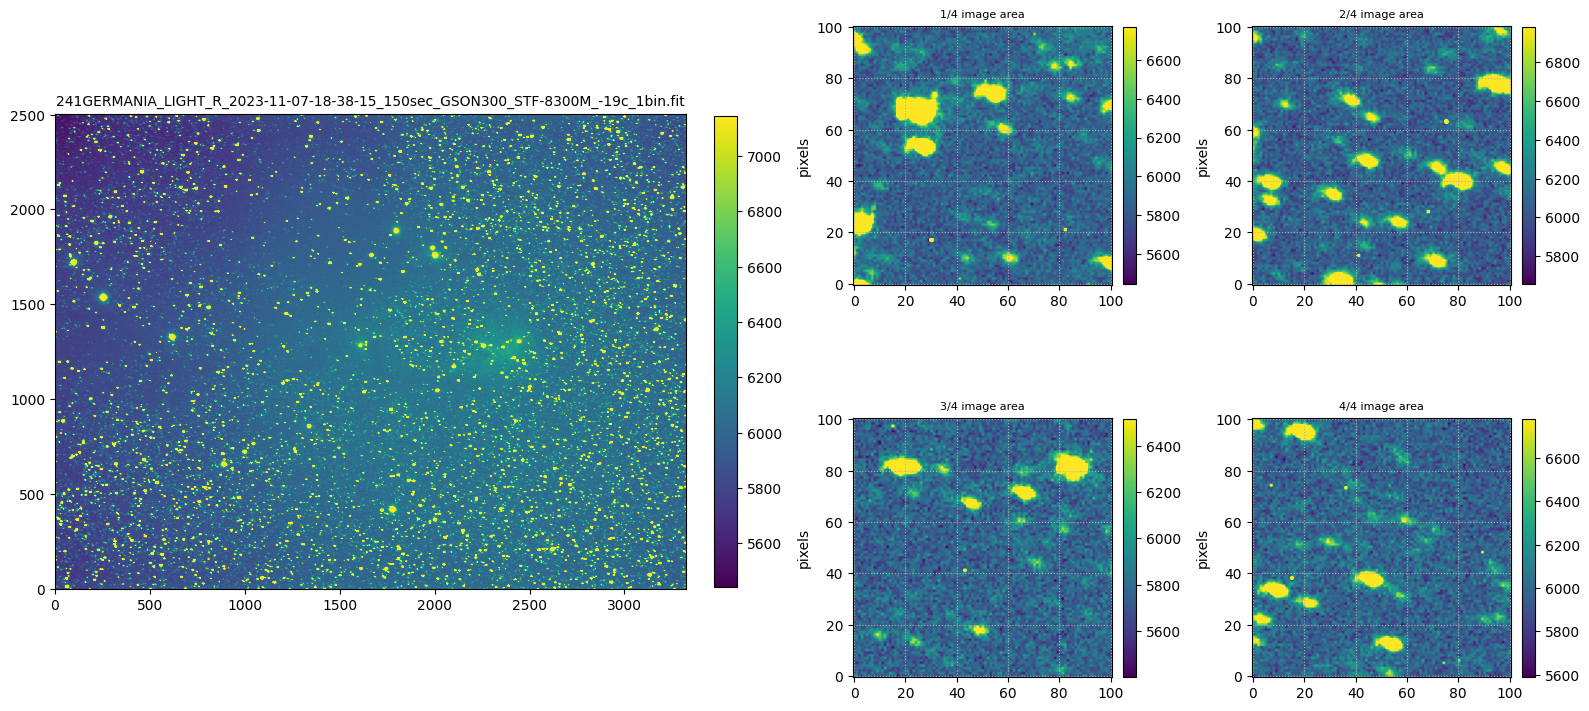

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D

hdul =  fits.open(str(fpaths[2]), unit="adu")

fig_set = plt.figure(figsize=(16, 8))

ax0 = plt.subplot2grid((2,4), (0,0),
                    colspan=2, rowspan=2,
                    fig=fig_set)
im0 = zimshow(ax0, hdul[0].data,
            origin='lower',
            )
plt.colorbar(im0,
             ax = ax0,
             fraction=0.0345, pad=0.04)
ax0.set_title(f"{fpaths[0].name}", fontsize=10)

cutsizes = 101

#1/4 area
ax20 = plt.subplot2grid((2,4), (0,2),
                       fig=fig_set)
cut_hdu = Cutout2D(
            data = hdul[0].data,
            position = (500, 500),
            size=(cutsizes, cutsizes) #cut ccd
            )
im20 = zimshow(ax20, cut_hdu.data,
    origin='lower'
    )
ax20.set_ylabel('pixels')
ax20.grid(ls=':')
ax20.set_title(f'1/4 image area', fontsize=8)
plt.colorbar(im20,
            ax=ax20,
            fraction=0.0455, pad=0.04)

#2/4 area
ax21 = plt.subplot2grid((2,4), (0,3),
                       fig=fig_set)
cut_hdu = Cutout2D(
            data = hdul[0].data,
            position = (hdul[0].data.shape[1] - 500, 500),
            size=(cutsizes, cutsizes) #cut ccd
            )
im21 = zimshow(ax21 ,cut_hdu.data,
    origin='lower'
    )
ax21.set_ylabel('pixels')
ax21.grid(ls=':')
ax21.set_title(f'2/4 image area', fontsize=8)
plt.colorbar(im21,
            ax=ax21,
            fraction=0.0455, pad=0.04)

#3/4 area
ax30 = plt.subplot2grid((2,4), (1,2),
                       fig=fig_set)
cut_hdu = Cutout2D(
            data = hdul[0].data,
            position = (500, hdul[0].data.shape[0] - 500),
            size=(cutsizes, cutsizes) #cut ccd
            )
im30 = zimshow(ax30, cut_hdu.data,
    origin='lower'
    )
ax30.set_ylabel('pixels')
ax30.grid(ls=':')
ax30.set_title(f'3/4 image area', fontsize=8)
plt.colorbar(im30,
            ax=ax30,
            fraction=0.0455, pad=0.04)

#4/4 area
ax31 = plt.subplot2grid((2,4), (1,3),
                       fig=fig_set)
cut_hdu = Cutout2D(
            data = hdul[0].data,
            position = (hdul[0].data.shape[1] - 500, hdul[0].data.shape[0] - 500),
            size=(cutsizes, cutsizes) #cut ccd
            )
im31 = zimshow(ax31, cut_hdu.data,
    origin='lower'
    )
ax31.set_ylabel('pixels')
ax31.grid(ls=':')
ax31.set_title(f'4/4 image area', fontsize=8)
plt.colorbar(im31,
            ax=ax31,
            fraction=0.0455, pad=0.04)

plt.tight_layout()
plt.show()

### 함수 만들기

한 이미지에서 부분을 잘라 확대하여 display 하는 함수를 만들어 편리하게 사용할 수 있습니다.
아래 코드는 생성형 AI [claude](https://claude.ai/)를 이용하여 함수로 정리한 것입니다.

In [11]:
import matplotlib.patches as patches
from astropy.nddata import Cutout2D

def plot_image_with_cutouts(fpath, location, cutsizes=101):
    hdul = fits.open(str(fpath), unit="adu")
    data = hdul[0].data

    fig_set = plt.figure(figsize=(16, 8))

    def add_subplot(position, data, title):
        ax = plt.subplot2grid((2,4), position, fig=fig_set)
        im = zimshow(ax, data, origin='lower')
        ax.set_ylabel('pixels')
        ax.grid(ls=':')
        ax.set_title(title, fontsize=8)
        plt.colorbar(im, ax=ax, fraction=0.0455, pad=0.04)
        return im

    def add_rectangle(x, y, label):
        rect = patches.Rectangle((x-cutsizes/2, y-cutsizes/2), cutsizes,
                                cutsizes, linewidth=1,
                                edgecolor='r', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x, y, label)

    # 전체 이미지
    ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2, fig=fig_set)
    im1 = zimshow(ax1, data, origin='lower')
    plt.colorbar(im1, ax=ax1, fraction=0.0345, pad=0.04)
    ax1.set_title(f"{fpath.name}", fontsize = 10)


    # 4개의 부분 이미지
    positions = [(0,2), (0,3), (1,2), (1,3)]
    corners = [(location, data.shape[0] - location),
                (data.shape[1] - location, data.shape[0] - location),
                (location, location),
                (data.shape[1] - location, location),
                ]

    for i, (pos, corner) in enumerate(zip(positions, corners), 1):
        cut_hdu = Cutout2D(data=data, position=corner, size=(cutsizes, cutsizes))
        add_subplot(pos, cut_hdu.data, f'{i}/4 image area')
        add_rectangle(corner[0], corner[1], f"{i}/4")

    plt.tight_layout()
    plt.show()

# 함수 사용 예
# plot_image_with_cutouts('path_to_your_fits_file.fits', location)

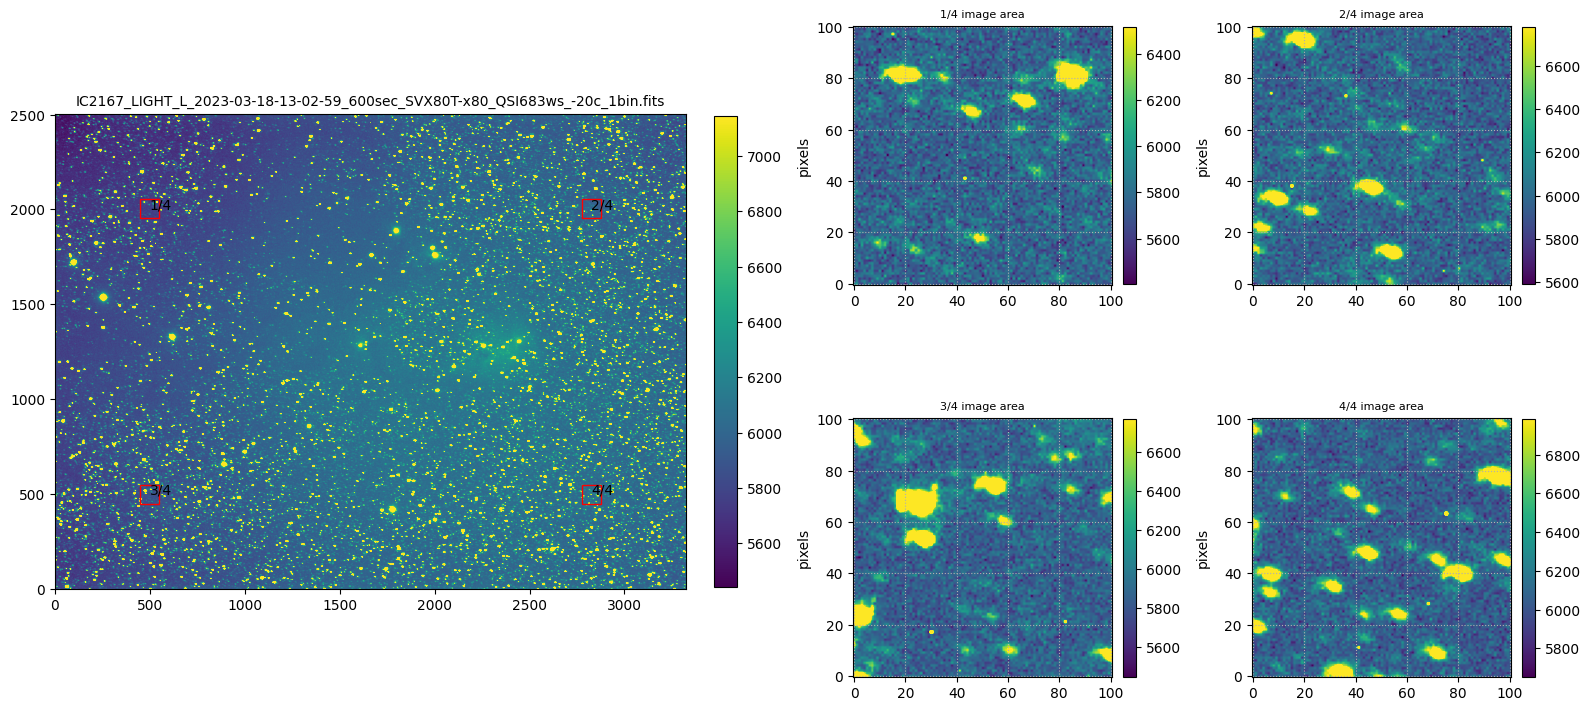

In [12]:
# 함수 사용 예
plot_image_with_cutouts(fpaths[2], 500)

### (과제)
모두 아래의 코딩셀에 입력하여 제출하시오.

1. fpaths[1]의 파일을 위 그림처럼 display 해 봅시다. (코딩을 해야 함.)
2. 위에서 출력한 파일(fpaths[2])과 별의 모양이 어떻게 다른지 그에 영향을 미치는 요인은 무엇인지 판단하여 answer 변수에 string으로 저장한 후 출력하시오.


fpaths [PosixPath('GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit'), PosixPath('GSHS_Photometry/46P-WIRTANEN_LIGHT_R_2018-12-13-17-46-15_60sec_FSQ106ED-x73_QSI683ws_-30c_2bin.fit'), PosixPath('GSHS_Photometry/IC2167_LIGHT_L_2023-03-18-13-02-59_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits'), PosixPath('GSHS_Photometry/IC434_Light_H_2019-10-08-09-38-54_900sec_GSON300_QSI683ws_-15C_1bin.fit'), PosixPath('GSHS_Photometry/M13_Light_L_2021-06-04-13-10-16_090sec_TEC140x75_STL-11000M_-19C_1bin.fit'), PosixPath('GSHS_Photometry/NGC6992_LIGHT_L_2023-06-23-15-37-09_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits')]


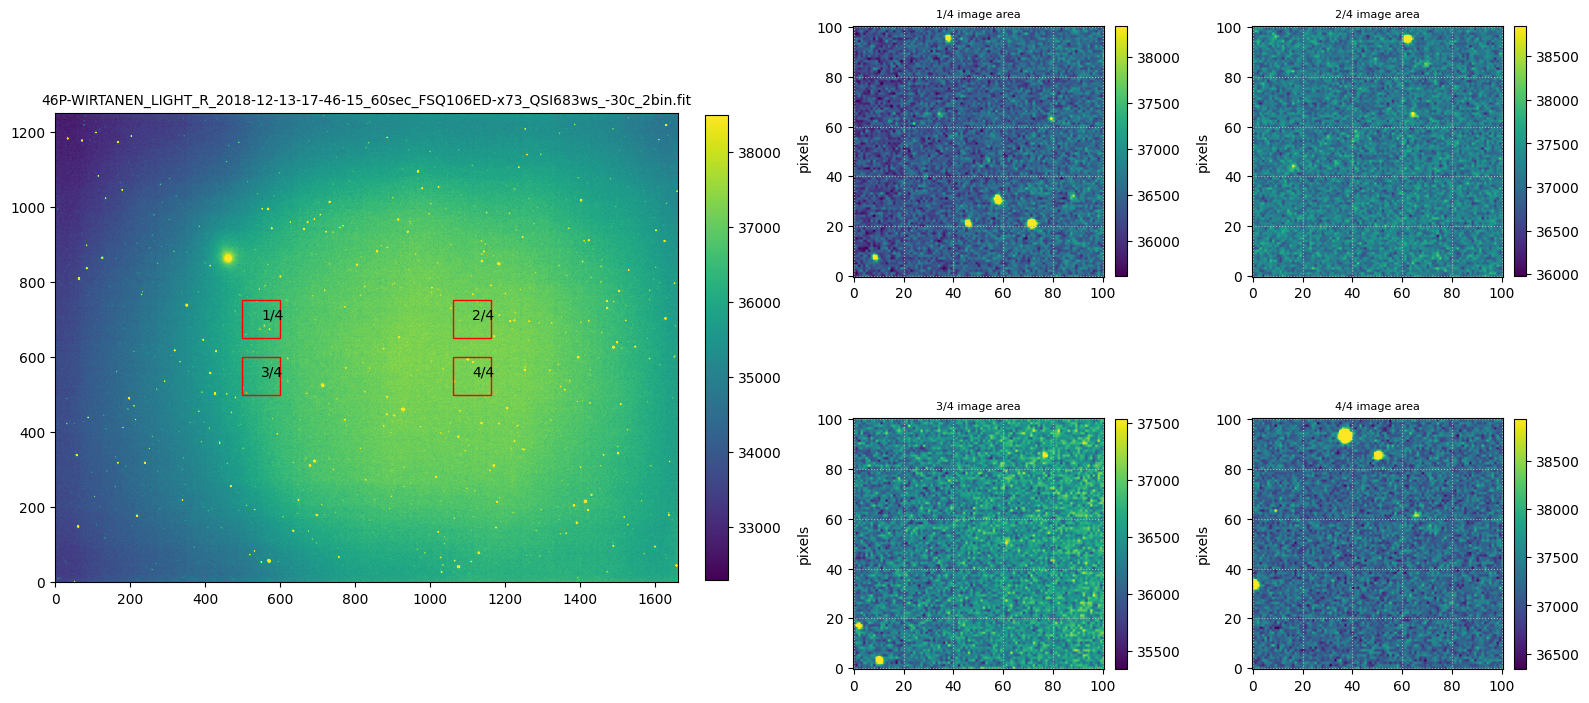

별의 모양에 영향을 미치는 요인 : 


        
별의 모양에 영향을 미치는 요인 : Seeing, 광학계, FWHM, 노출시간, 망원경의 구경, CCD의 종류, 필터, 대기의 상태 등


In [13]:
#(과제) 1. fpaths[1]의 파일을 위 그림처럼 display 해 봅시다.
#이곳에 코딩을 완성하여 제출하시오.
print("fpaths", (fpaths))

# 함수 사용 예
plot_image_with_cutouts(fpaths[1], 550)



#(과제) 2. 별의 모양이 어떻게 다른지 그에 영향을 미치는 요인은 무엇인지 answer 변수에 string으로 저장한 후 출력하시오.
answer = """


        """
print(f"별의 모양에 영향을 미치는 요인 : {answer}")
print(f"별의 모양에 영향을 미치는 요인 : Seeing, 광학계, FWHM, 노출시간, 망원경의 구경, CCD의 종류, 필터, 대기의 상태 등")


## Seeing

Seeing 이란, 지구대기의 흔들림이나 망원경 내부 공기의 대류에 의해 상이 흐려지거나 불규칙하게 변동하는 것을 말합니다. 보통 5단계에서 10단계에 걸쳐 등급을 매기기도 하는데  별이 점상으로 정지해 있을 때를 가장 좋은상태 5 또는 10으로 하고, 별과 배경의 구별이 되지 않는 가장 나쁜 상태를 1로 기입합니다. [네이버 지식백과](https://terms.naver.com/entry.nhn?docId=1621937&cid=42469&categoryId=42469).  

### Point Spread Function

별을 point source라 가정하면 seeing 때문에 CCD에 촬영된 별은 부드럽게 퍼져 보이는데 이 모양은 **점퍼짐 함수(point spread function)** 을 따르며 줄여서  **psf**.라고 합니다.

널리 사용되는 점퍼짐 함수로 [Gaussian](https://en.wikipedia.org/wiki/Gaussian_function) 과 [Moffat](https://en.wikipedia.org/wiki/Moffat_distribution) 두 가지가 있습니다.  

psf에서 사용되는 parameter 중에서 널리 사용되는 것이 FWHM (full width at half-maximum)입니다. FWHM의 정의는 $\frac{1}{2} f_{\rm max}$ 이 되는 두점 사이의 거리 입니다.

#### Gaussian function

원형으로 대칭인 Gauss psf 는 다음과 같습니다.

$$ f_{\rm Gauss}(r) = A e^{ -(r-r_0)^2/2\sigma^2 } $$

여기에서 $r$은 중심 $r_0$ 부터의 거리이고, $\sigma$ 는 이 profile standard deviation 입니다. normalization constant $A = \frac{1}{\sqrt{2 \pi \sigma^2}}$ 이고, 적분하면  $ \int_{-\infty}^{+\infty} f_{\rm Gauss}(r) dr = 1$ 입니다.

$f_{\rm Gauss}(r_{1/2}) = \frac{A}{2}$ 로 정하여 FWHM 을 구해보면 $ (r_{1/2} - r_0)^2 = 2 \sigma^2 \log_e 2 $ 이므로, $ {\rm FWHM} := 2(r_{1/2} - r_0) = 2 \sigma \sqrt{2 \log_e 2} $ 이 됩니다.


* 중심에서 멀어질수록 밝기가 매우 빠르게 감소하고 꼬리 부분이 매우 짧아 급격하게 0에 수렴합니다.
* 대칭적인 형태로 수학적으로 간단하고 계산이 빠르며 많은 자연 현상에서 널리 사용되는 함수입니다.

#### Moffat

원형으로 대칭인 Moffat psf 는 다음과 같습니다.

$$f_{\rm Moffat} (r) = A \left [ 1 + \left ( \frac{r-r_0}{R} \right )^2 \right ]^{-\beta} ~.$$

역시 Gauss psf에서와 마찬가지로 $r$ 은 중심 $r_0$ 부터의 거리입니다. 적분하여 얻은 normalization constant $ A = \frac{\Gamma(\beta)}{R\sqrt{\pi} \Gamma(\beta-\frac{1}{2})} $인데, parameter $R$ 은 core width 로 불리고, $\beta$ 는 power 라고 합니다.

[astropy Moffat 2D](http://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Moffat2D.html#astropy.modeling.functional_models.Moffat2D)에서는 `gamma`가 코어 너비($R$)에 사용되고 `alpha`가 거듭제곱($\beta$)에 사용되므로 혼란스러울 수 있습니다. [IRAF Moffat 2D](http://stsdas.stsci.edu/cgi-bin/gethelp.cgi?psfmeasure)는 코어 너비($R$)로 `alpha`를 사용하고 천문학에서 보다 표준적인 표기법인 베타($\beta$)를 사용합니다. Moffat는 이 프로필을 처음 도입했을 때 대기 난류, 기기 수차 및 사진 수신기를 고려했습니다.

Gauss example 에서와 같이 $f_{\rm Moffat}(r_{1/2}) = \frac{A}{2}$ 로 FWHM 을 구해보면 $ (r_{1/2} - r_0)^2 = R^2 (2^{1/\beta}-1) $ 이므로, $ {\rm FWHM} := 2(r_{1/2} - r_0) = 2 R \sqrt{2^{1/\beta}-1} $ 입니다.

* 중심 부근에서는 Gauss 함수와 비슷한 형태를 보이고 가장자리에서는 Gauss 함수에 비해 꼬리 부분이 더 길고 완만하게 감소합니다.
* β라는 매개변수를 통해 꼬리 부분의 길이를 조절하여 실제 천체의 밝기 분포를 더 정확하게 모델링할 수 있지만 Gauss 함수에 비해 수학적으로 복잡하고 계산 시간이 오래 걸릴 수 있습니다.


### Comparison (Gauss VS Moffat)

균일한 대기 관측 조건과 긴 노출 시간에서 psf는 대칭 모양으로 수렴해야 합니다. 즉, 등광선 곡선은 동심원처럼 보여야 하는데 실제로 그런 경우는 거의 없습니다. 관측된 별의 모양은  타원형, 심지어는 불규칙한 모양으로 나나타기도 하는데 한 축 방향으로만 시뮬레이션 해 볼 수 있습니다.

일반적으로 우리는 별 상이 대칭이라고 가정하고 원형 구경으로 측광을 수행합니다. 아래 코드는 이 둘을 비교하기 위한 시뮬레이션입니다.  

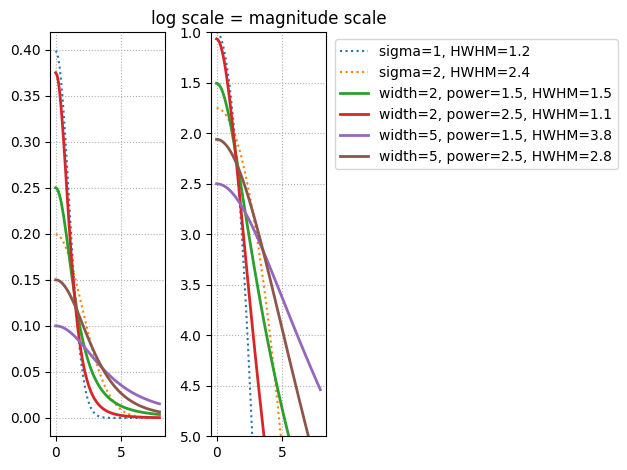

In [14]:
from astropy.modeling.functional_models import Moffat1D, Gaussian1D
from scipy.special import gamma as G
import numpy as np

def norm_gauss(sigma):
    return 1/np.sqrt(2 * np.pi * sigma**2)

def norm_moffat(width, power):
    return G(power) / (width * np.sqrt(np.pi) * G(power - 1/2))

def HWHM_moffat(width, power):
    return width * np.sqrt( 2**(1/power) - 1)

x       = np.arange(0,8,0.1)
sigma   = np.array([1, 2])
width   = np.array([2, 5])
power   = np.array([1.5, 2.5])


ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
for s in sigma:
    gauss  = Gaussian1D(amplitude=1, mean=0, stddev=s)
    ax1.plot(x, norm_gauss(s)*gauss(x), ls=":",
             label="sigma={0:.0f}, HWHM={1:.1f}".format(s, 2.355*s/2))
    ax2.plot(x, -2.5 * np.log10(norm_gauss(s)*gauss(x)), ls=":",
             label="sigma={0:.0f}, HWHM={1:.1f}".format(s, 2.355*s/2))

for w in width:
    for p in power:
        moffat = Moffat1D(amplitude=1, x_0=0, gamma=w, alpha=p)
        HWHM   = HWHM_moffat(w, p)
        ax1.plot(x, norm_moffat(w, p) * moffat(x), lw=2,
                 label=' w={0:.0f}, p={1:.1f}, HWHM={2:.1f}'.format(w, p, HWHM))
        ax2.plot(x, -2.5*np.log10(norm_moffat(w, p) * moffat(x)), lw=2,
                 label='width={0:.0f}, power={1:.1f}, HWHM={2:.1f}'.format(w, p, HWHM))

ax1.grid(ls=":")
ax2.grid(ls=":")
ax2.set_ylim(1, 5)
ax2.invert_yaxis()
ax2.set_title('log scale = magnitude scale')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

## Star profile 2d plot

### display new image

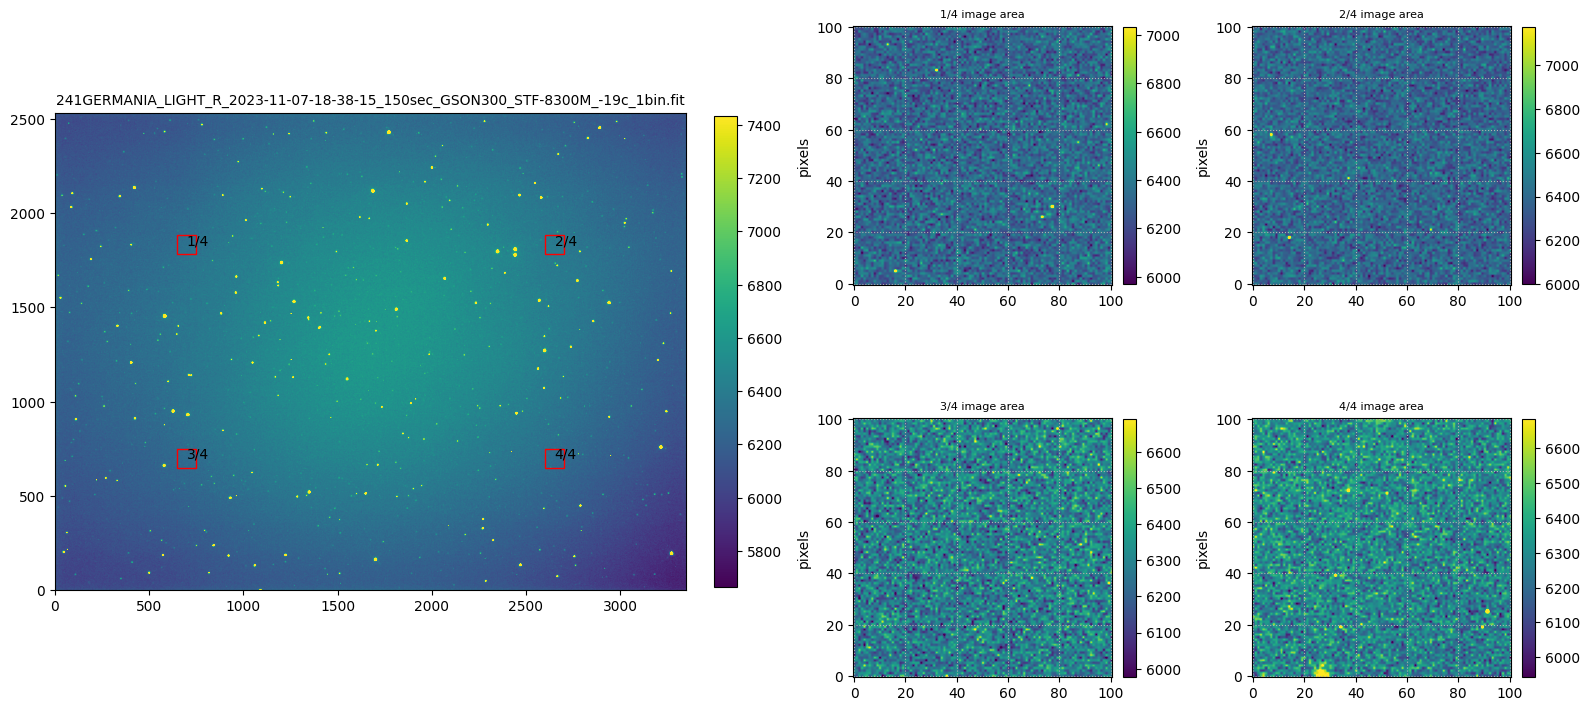

In [15]:
# 함수 사용 예
plot_image_with_cutouts(fpaths[0], 700)

### 한 줄의 픽셀값 출력

다음과 같은 그림을 생성형 AI를 이용하여 그려보겠습니다.
* fpaths[0]의 fits file을 읽는다.
* 특정 행(910번)의 픽셀 값을 추출한 후 가로축을 픽셀 넘버 새로축을 픽셀 값을 세로축으로 plot
* plot의 가로 길이를 매우 길게 설정
* plot에 그리드를 추가하고 마이너 틱과 레이블을 추가

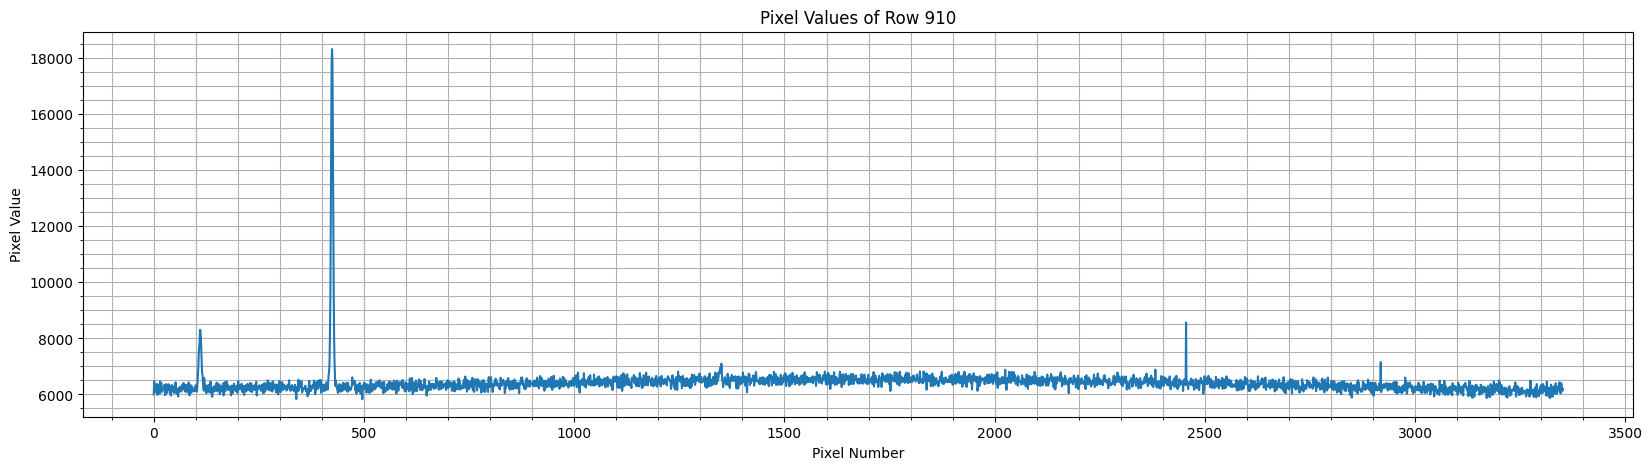

In [16]:
# prompt: * fpaths[0]의 fits file을 읽는다.
# * 특정 행(910번)의 픽셀 값을 추출한 후 가로축을 픽셀 넘버 새로축을 픽셀 값을 세로축으로 plot
# * plot의 가로 길이를 매우 길게 설정
# * plot에 그리드를 추가하고 마이너 틱과 레이블을 추가

import matplotlib.pyplot as plt
hdul = fits.open(str(fpaths[0]), unit="adu")
data = hdul[0].data

row_index = 910  # 특정 행 인덱스
row_data = data[row_index, :]

plt.figure(figsize=(20, 5))  # 가로 길이를 길게 설정
plt.plot(row_data)
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Value')
plt.title(f'Pixel Values of Row {row_index}')
plt.grid(True, which='both')  # 그리드 추가
plt.minorticks_on()  # 마이너 틱 추가
plt.show()


### 일부분 잘라내기

위 그림에서 픽셀 값이 가장 큰 부분을 잘라서 픽셀 값으로 그래프를 그리면 다음과 같이 별의 모양을 볼 수 있습니다.

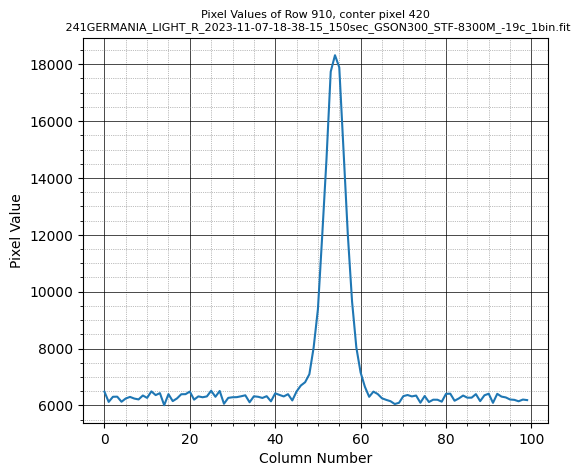

In [17]:
# prompt: fits file로 부터 특정 행의 픽셀 값을 추출한 후 가로 너비를 지정하여 픽셀 값을 세로축으로 plot 하는 코드를 짜는데 그래프 가로 길이를 매우 길게 그려줘
# 그리드를 추가하고 마이너 틱과 레이블을 추가해줘

import matplotlib.pyplot as plt

def plot_row_pixels(fpath, row_index, col_center, width):
  """
  FITS 파일에서 특정 행의 픽셀 값을 추출하여 가로 너비를 지정하여 세로축으로 plot합니다.

  Args:
    fpath: FITS 파일 경로
    row_number: 추출할 행 번호
    width: 그래프 가로 길이
  """
  hdul = fits.open(str(fpath), unit="adu")
  data = hdul[0].data
  row_data = data[row_index, col_center-width:col_center+width]

  plt.figure(figsize=(6, 5))  # 가로 길이를 매우 길게 설정
  plt.plot(row_data)
  plt.xlabel("Column Number")
  plt.ylabel("Pixel Value")
  plt.title(f"Pixel Values of Row {row_number}, conter pixel {col_center}\n {fpath.name}", fontsize = 8)
  plt.grid(True)  # 그리드 추가

  # 마이너 틱과 레이블 추가
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

  plt.show()

# 예시 사용
row_number = 910  # 추출할 행 번호
col_center = 420  # 중심 픽셀 번호
width = 50  # 가로 픽셀 너비

plot_row_pixels(fpaths[0], row_number, col_center, width)


### FWHM

위 그림에서 다음과 같이 FWHM(Full width half maximum)을 계산할 수 있습니다.

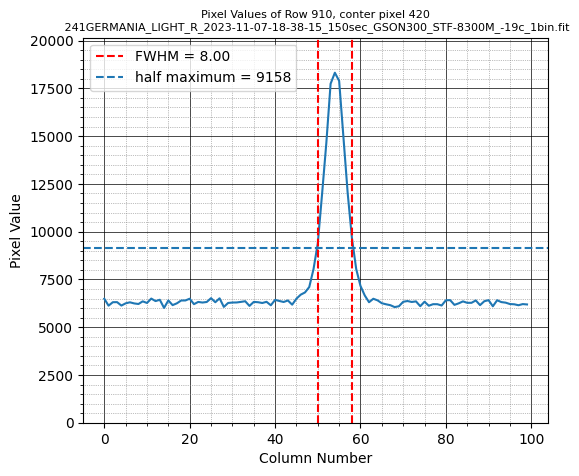

In [18]:
def plot_row_pixels_fwhm(fpath, row_number, conter, width):
    """
    FITS 파일에서 특정 행의 픽셀 값을 추출하여 가로 너비를 지정하여 세로축으로 plot합니다.

    Args:
    fpath: FITS 파일 경로
    row_number: 추출할 행 번호
    width: 그래프 가로 길이
    """
    hdul = fits.open(str(fpath), unit="adu")
    data = hdul[0].data
    row_data = data[row_number, conter-width:conter+width]

    plt.figure(figsize=(6, 5))  # 가로 길이를 매우 길게 설정
    plt.plot(row_data)

    # FWHM 계산
    x = np.arange(len(row_data))
    y = row_data

    # Find the peak value and its index
    peak_value = np.max(y)
    peak_index = np.argmax(y)

    # Calculate the half maximum value
    half_max = peak_value  / 2.0

    # Find the indices where the values are closest to the half maximum
    left_index = np.argmin(np.abs(y[:peak_index] - half_max))
    right_index = np.argmin(np.abs(y[peak_index:] - half_max)) + peak_index

    # Calculate the FWHM
    fwhm = x[right_index] - x[left_index]

    # FWHM 표시
    plt.axvline(x=left_index, color='r', linestyle='--', label=f'FWHM = {fwhm:.2f}')
    plt.axvline(x=right_index, color='r', linestyle='--')
    plt.axhline(y=half_max, linestyle='--', label=f'half maximum = {half_max:.0f}')
    plt.legend()
    plt.ylim(0, peak_value*1.1)
    plt.xlabel("Column Number")
    plt.ylabel("Pixel Value")
    plt.title(f"Pixel Values of Row {row_number}, conter pixel {col_center}\n {fpath.name}", fontsize = 8)
    plt.grid(True)  # 그리드 추가

    # 마이너 틱과 레이블 추가
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    plt.show()


plot_row_pixels_fwhm(fpaths[0], row_number, col_center, width)

### Real FWHM of star psf

픽셀 값의 Maximun은 어디서 부터 구해야 할까요? Star profile의 진짜 fwhm은 다음과 같이 하늘의 백그라운드 값에서 부터 구해야 할 것입니다.  

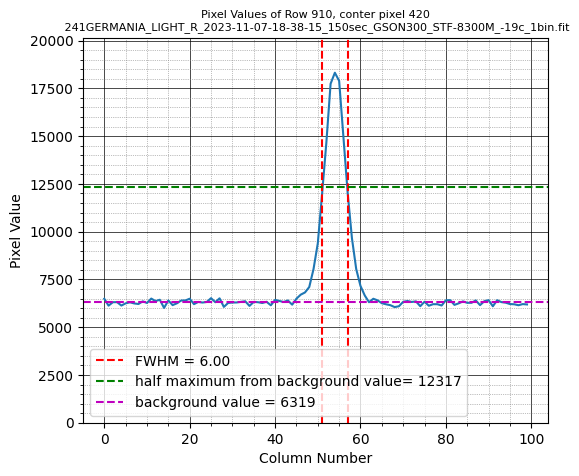

In [19]:
import matplotlib.pyplot as plt

def plot_row_pixels_fwhm_from_background(fpath, row_number, conter, width):
    """
    FITS 파일에서 특정 행의 픽셀 값을 추출하여 가로 너비를 지정하여 세로축으로 plot합니다.

    Args:
    fpath: FITS 파일 경로
    row_number: 추출할 행 번호
    width: 그래프 가로 길이
    """
    hdul = fits.open(str(fpath), unit="adu")
    data = hdul[0].data
    row_data = data[row_number, conter-width:conter+width]

    plt.figure(figsize=(6, 5))  # 가로 길이를 매우 길게 설정
    plt.plot(row_data)

    # FWHM 계산
    x = np.arange(len(row_data))
    y = row_data

    # Find the peak value and its index
    peak_value = np.max(y)
    peak_index = np.argmax(y)

    # Calculate the half maximum value
    half_max = ((peak_value - np.median(y)) / 2.0) + np.median(y)

    # Find the indices where the values are closest to the half maximum
    left_index = np.argmin(np.abs(y[:peak_index] - half_max))
    right_index = np.argmin(np.abs(y[peak_index:] - half_max)) + peak_index

    # Calculate the FWHM
    fwhm = x[right_index] - x[left_index]

    # FWHM 표시
    plt.axvline(x=left_index, color='r', linestyle='--', label=f'FWHM = {fwhm:.2f}')
    plt.axvline(x=right_index, color='r', linestyle='--')
    plt.axhline(y=half_max, color='g', linestyle='--', label=f'half maximum from background value= {half_max:.0f}')
    plt.axhline(y=np.median(y), color='m', linestyle='--', label=f'background value = {np.median(y):.0f}')
    plt.legend()
    plt.ylim(0, peak_value*1.1)
    plt.xlabel("Column Number")
    plt.ylabel("Pixel Value")
    plt.title(f"Pixel Values of Row {row_number}, conter pixel {col_center}\n {fpath.name}", fontsize = 8)
    plt.grid(True)  # 그리드 추가

    # 마이너 틱과 레이블 추가
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    plt.show()


plot_row_pixels_fwhm_from_background(fpaths[0], row_number, col_center, width)


## 별 찾기 (Finding stars)

### DAO star finder

[photutils.detection](https://photutils.readthedocs.io/en/stable/api/photutils.detection.DAOStarFinder.html)의 DAOStarFinder를 이용하여 fits 파일에서 별을 찾을 수 있습니다.

반치전폭(fwhm)과 배경의 한계값(threshold)은 필수적으로 입력해 주어야 합니다.

#### 반치전폭(fwhm)
반치전폭(Full Width at Half Maximum)은 star profile을 추정하는 데 사용되는 값입니다. 일반적으로 이미지의 seeing 조건에 따라 적절한 값을 설정해야 합니다.

In [20]:
hdul =  fits.open(str(fpaths[0]), unit="adu")

FWHM = 5


#### 배경의 한계값(threshold)
별을 검출하기 위한 임계값입니다. 이 값보다 밝은 지역을 별 후보로 간주합니다. 너무 낮게 설정하면 노이즈를 별로 오인할 수 있고, 너무 높게 설정하면 희미한 별을 놓칠 수 있습니다.


photutils.detect_threshold를 이용하여 하늘의 임계값을 쉽게 구할 수 있습니다.

In [21]:
from photutils import detect_threshold
thresh_snr = detect_threshold(data=hdul[0].data, nsigma=3,)
print('type(thresh_snr) :', type(thresh_snr))
print('thresh_snr.shape :', thresh_snr.shape)
print('detect_threshold', thresh_snr)
thresh_snr = thresh_snr[0][0]

/tmp/ipykernel_104271/1128550268.py:1: DeprecationWarning: `photutils.detect_threshold` is a deprecated alias for `photutils.segmentation.detect_threshold` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_threshold` to silence this warning.
  from photutils import detect_threshold


type(thresh_snr) : <class 'numpy.ndarray'>
thresh_snr.shape : (2532, 3352)
detect_threshold [[6891.224535 6891.224535 6891.224535 ... 6891.224535 6891.224535
  6891.224535]
 [6891.224535 6891.224535 6891.224535 ... 6891.224535 6891.224535
  6891.224535]
 [6891.224535 6891.224535 6891.224535 ... 6891.224535 6891.224535
  6891.224535]
 ...
 [6891.224535 6891.224535 6891.224535 ... 6891.224535 6891.224535
  6891.224535]
 [6891.224535 6891.224535 6891.224535 ... 6891.224535 6891.224535
  6891.224535]
 [6891.224535 6891.224535 6891.224535 ... 6891.224535 6891.224535
  6891.224535]]


sigma_clip을 이용하여 구하는 방법도 있습니다. 경우에 따라서 두가지 방법중 한가지를 사용하면 됩니다.

In [22]:
from astropy.stats import sigma_clip, sigma_clipped_stats

avg, med, std = sigma_clipped_stats(hdul[0].data)  # by default, 3-sigma 5-iteration.
print("avg, med, std :", avg, med, std)
thresh = 5.*std
print("thresh :", thresh)

avg, med, std : 6313.656075516996 6311.0 192.52281982773434
thresh : 962.6140991386717


#### photutils.detection.DAOStarFinder

아래 코드로 별을 찾을 수 있습니다.

In [23]:
from photutils.detection import DAOStarFinder

DAOfind = DAOStarFinder(
                        fwhm = FWHM,
                        threshold = thresh,
                        # sharplo = 0.2, sharphi = 1.0,  # default values: sharplo=0.2, sharphi=1.0,
                        # roundlo = -1.0, roundhi = 1.0,  # default values -1 and +1
                        # sigma_radius = 1.5,           # default values 1.5
                        # ratio = 1.0,                  # 1.0: circular gaussian
                        # exclude_border = True         # To exclude sources near edges
                        )
DAOfound = DAOfind(hdul[0].data)
print("len(DAOfound) :",len(DAOfound))
DAOfound

len(DAOfound) : 288


<QTable length=288>
  id      xcentroid      ...        flux                mag         
int64      float64       ...      float64             float64       
----- ------------------ ... ------------------ --------------------
    1 2.2336263777322882 ...  7.586273325744432  -2.2000712145974437
    2  3348.850643196145 ... 7.5315554964163125  -2.1922117013733415
    3  2283.868850048074 ...   8.67616893746038  -2.3458199994032594
    4  349.3264620854308 ... 1.7427368231294833   -0.603079519277654
    5  2663.961653787053 ... 13.258941393802054   -2.806272127445058
    6 108.22407388618265 ...  1.160500218918853 -0.16161306679509513
    7 3179.8507231518693 ... 1.5045261608767782 -0.44349935926244544
    8 1509.0225489800512 ... 4.7923355740243085  -1.7013680526916597
    9   816.585355730482 ...  4.915349969439456  -1.7288861118219523
  ...                ... ...                ...                  ...
  279 2888.1519917998976 ... 32.608786513805846  -3.7833365937517978
  280 1120.8047910294404 ...  1.193273343374834 -0.19184984748616601
  281  778.7567736345515 ...  4.834338873014691  -1.7108427247788454
  282  2753.147171448652 ... 1.8695016148644747  -0.6793146115785347
  283 2978.6753740414133 ... 2.2962107546686203  -0.9025293667506274
  284  2277.438700426257 ...  5.044501973952128  -1.7570457407827398
  285 1371.8284060688839 ... 1.9266951963950105  -0.7120325365166831
  286   609.739324155307 ... 1.1761846245086665 -0.17618874463943968
  287  2.197134573409101 ...  7.577059116282336  -2.1987516890801024
  288   3348.91082138219 ...  8.066731347682428  -2.2667439838840324

그외 옵션들을 세부적으로 입력할 수 있습니다.

* roundlo, roundhi: 별의 원형도(roundness) 범위를 설정합니다. 일반적으로 별은 원형에 가까운 형태이므로, 이 범위를 조절하여 비슷한 형태의 천체만 검출할 수 있습니다.
* sharplo, sharphi: 별의 선명도(sharpness) 범위를 설정합니다. 선명도는 별의 중심부와 주변부의 밝기 차이를 나타내는 값으로, 별과 다른 천체를 구분하는 데 사용됩니다.
* sky: 배경 노이즈의 평균값입니다. 이 값을 정확하게 설정하면 더 정확한 별 검출이 가능합니다.


In [24]:
DAOfind = DAOStarFinder(
                        fwhm = FWHM,
                        threshold = thresh,
                        # sharplo = 0.2, sharphi = 1.0,  # default values: sharplo=0.2, sharphi=1.0,
                        # roundlo = -1.0, roundhi = 1.0,  # default values -1 and +1
                        sigma_radius = 5,           # default values 1.5
                        # ratio = 1.0,                  # 1.0: circular gaussian
                        # exclude_border = True         # To exclude sources near edges
                        )

DAOfound = DAOfind(hdul[0].data)
print(f"{len(DAOfound)} stars were found...")

433 stars were found...


### astropy.table

DAOfound의 결과는 astropy.table로 반환됩니다.

In [25]:
print("type(DAOfound) :", type(DAOfound))
DAOfound

type(DAOfound) : <class 'astropy.table.table.QTable'>


<QTable length=433>
  id      xcentroid      ...        flux                mag        
int64      float64       ...      float64             float64      
----- ------------------ ... ------------------ -------------------
    1 3.8108183436357455 ... 21.739156842186297   -3.34310673968308
    2 3347.2540376072907 ... 20.952003616693798  -3.303063900960611
    3 2115.5329071837928 ... 2.3572357614289974  -0.931007552796991
    4 2283.9347125169193 ...  24.22939068177952 -3.4608562317048666
    5  349.3504134019757 ...  5.606176988614102 -1.8716670111048728
    6    2924.5913129595 ... 1.5931550443623652 -0.5056451074790274
    7  2664.048227193994 ...  38.53204622889342  -3.964555181650111
    8  3070.208922336195 ...  2.739042571240878 -1.0939969556908755
    9 107.99664364296741 ... 3.9935767995219003 -1.5034051016557093
  ...                ... ...                ...                 ...
  424  2098.967923553448 ...   1.55627974441298  -0.480219162442465
  425 2753.2838295407223 ...  6.800904859930339 -2.0814167485048514
  426  2277.635116633291 ...   17.0301673528976 -3.0780472893255935
  427  2978.668951353654 ... 10.155440306896086 -2.5167468943667988
  428 1371.9453727921223 ...  6.811112590157647 -2.0830451484675097
  429  389.6969450494538 ...   1.74718967624969 -0.6058501372098476
  430  609.7528376606167 ...  4.414017181383255  -1.612085048256556
  431  760.5211978415724 ... 2.4080400124251193 -0.9541592474020348
  432  3.812851045337869 ... 21.504384057610707 -3.3313175193164457
  433 3347.2631758539806 ... 21.491700178326646 -3.3306769331979797

사용법은 다음과 같으며 pandas의 dataframe과 비슷합니다.

In [26]:
print(f"DAOfound.colnames : {DAOfound.colnames}")
print(f"(type(DAOfound['xcentroid']) :", type(DAOfound['xcentroid']))
print(f"DAOfound['xcentroid'] : {DAOfound['xcentroid']}")

DAOfound.colnames : ['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag']
(type(DAOfound['xcentroid']) : <class 'astropy.table.column.Column'>
DAOfound['xcentroid'] :     xcentroid     
------------------
3.8108183436357455
3347.2540376072907
2115.5329071837928
2283.9347125169193
 349.3504134019757
   2924.5913129595
 2664.048227193994
 3070.208922336195
107.99664364296741
 3180.109840413615
               ...
 2098.967923553448
2753.2838295407223
 2277.635116633291
 2978.668951353654
1371.9453727921223
 389.6969450494538
 609.7528376606167
 760.5211978415724
 3.812851045337869
3347.2631758539806
Length = 433 rows


### Astropy.table과 DataFrame

Astropy.table과 DataFrame은 다음과 같은 공통점을 가지고 있습니다.
* 표 형태 데이터 저장: 둘 다 표 형태의 데이터를 저장하고 관리하는 데 특화된 자료 구조입니다.
* 컬럼별 데이터 타입: 각 컬럼에 서로 다른 데이터 타입(숫자, 문자열 등)을 저장할 수 있습니다.
* 행과 열 접근: 행과 열 인덱싱을 통해 데이터에 접근하고 조작할 수 있습니다.
* 다양한 연산 지원: 각 행이나 열에 대한 수학적 연산, 통계 연산 등을 지원합니다.

astropy.tabel은 아래와 같이 dataframe으로 쉽게 변환할 수 있습니다.

In [27]:
df = DAOfound.to_pandas()
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


id    xcentroid    ycentroid  sharpness  roundness1  roundness2  npix  \
0      1     3.810818     3.728678   0.513531    0.206042    0.009041   441   
1      2  3347.254038     3.756011   0.501424   -0.203687   -0.006816   441   
2      3  2115.532907    26.736222   0.710915   -0.144108   -0.186624   441   
3      4  2283.934713    47.824476   0.939355    0.075097    0.000193   441   
4      5   349.350413    60.201616   0.916430    0.112685   -0.148319   441   
..   ...          ...          ...        ...         ...         ...   ...   
428  429   389.696945  2492.009165   0.828712    0.082006    0.109708   441   
429  430   609.752838  2493.415463   0.664400   -0.027924   -0.070917   441   
430  431   760.521198  2495.499839   0.828722    0.020134   -0.227181   441   
431  432     3.812851  2527.225295   0.486144   -0.199414    0.025542   441   
432  433  3347.263176  2527.274499   0.517019    0.182702   -0.006135   441   

     sky     peak       flux       mag  
0    0.0   6136.0  21.739157 -3.343107  
1    0.0   5854.0  20.952004 -3.303064  
2    0.0   6710.0   2.357236 -0.931008  
3    0.0  13115.0  24.229391 -3.460856  
4    0.0   7626.0   5.606177 -1.871667  
..   ...      ...        ...       ...  
428  0.0   6554.0   1.747190 -0.605850  
429  0.0   7103.0   4.414017 -1.612085  
430  0.0   6795.0   2.408040 -0.954159  
431  0.0   5943.0  21.504384 -3.331318  
432  0.0   6140.0  21.491700 -3.330677  

[433 rows x 11 columns]

### 이미지에서 별의 픽셀 좌표

 np.transpose 함수는 배열의 축(axis) 순서를 바꾸는 역할을 합니다. 쉽게 말해, 행과 열의 위치를 바꾸거나, 더 높은 차원의 배열에서 축의 순서를 변경할 수 있는 함수입니다. 이를 통해 데이터의 형태를 변형하고, 다양한 행렬 연산에 활용할 수 있습니다.

In [28]:
pos = np.transpose((DAOfound['xcentroid'], DAOfound['ycentroid']))
print(f"len(pos): {len(pos)}")
print(f"pos[0]: {pos[0]}")
pos  # DAOfound로 찾아낸 별의 픽셀 좌표

len(pos): 433
pos[0]: [3.81081834 3.72867824]


array([[   3.81081834,    3.72867824],
       [3347.25403761,    3.75601052],
       [2115.53290718,   26.73622196],
       [2283.93471252,   47.82447589],
       [ 349.3504134 ,   60.20161609],
       [2924.59131296,   70.34357887],
       [2664.04822719,   73.07931553],
       [3070.20892234,   80.39859517],
       [ 107.99664364,   82.7009918 ],
       [3180.10984041,   83.64318724],
       [1890.84469895,   88.53320664],
       [ 816.60192441,   91.07546131],
       [ 498.83225942,   91.68494154],
       [2046.58945159,  103.8817969 ],
       [1432.12432803,  113.39515876],
       [ 565.88651793,  120.08594418],
       [2684.74515797,  126.79633726],
       [1012.37311839,  127.93655554],
       [1059.18657505,  130.23241404],
       [2760.61088309,  131.16065122],
       [2467.68444747,  132.63790849],
       [1157.86174645,  135.67479834],
       [ 408.31114415,  147.21980329],
       [1221.70418289,  149.56265298],
       [1699.96561169,  162.15873991],
       [1403.18010105,  1

### tag stars on image

별의 좌표에 원형의 구경(Circular Aperture)를 설정하여 이미지 위에 표시할 수 있다.

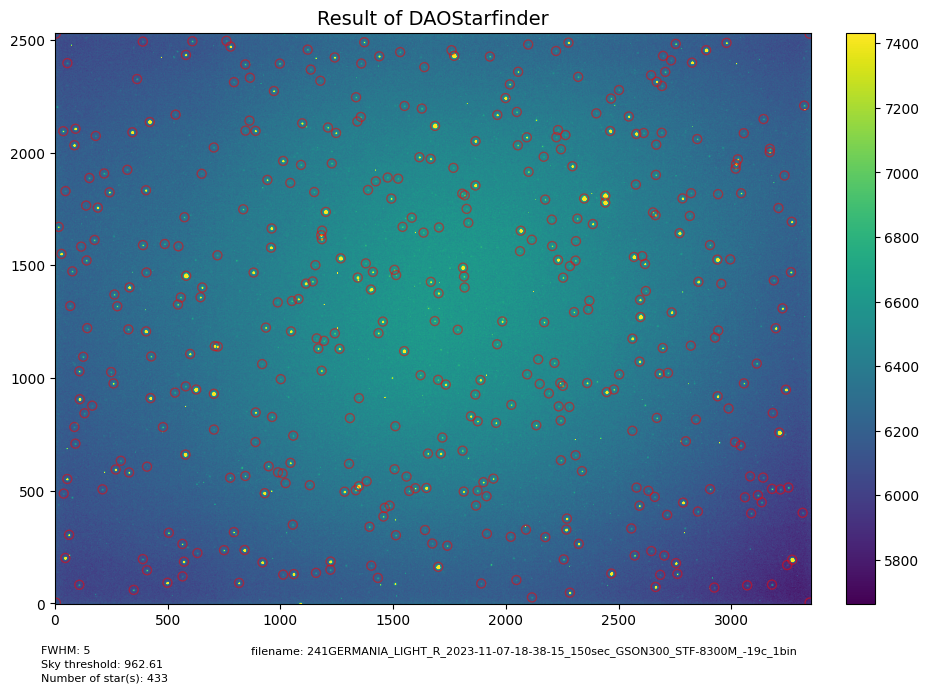

In [29]:
from photutils.aperture import CircularAperture as CAp

ap = CAp(pos, r=FWHM*4)

fig, axs = plt.subplots(1, 1, figsize=(10, 7),
                        sharex=False, sharey=False, gridspec_kw=None)

im1 = zimshow(axs, hdul[0].data,
            origin='lower',
            )

ap.plot(color='r', lw=1, alpha=0.5)

###########################################################
# input some text for explaination.
plt.title("Result of DAOStarfinder", fontsize = 14,
    ha='center')

plt.annotate(f'filename: {fpath.stem}', fontsize=8,
    xy=(1, 0), xytext=(-10, -30), va='top', ha='right',
    xycoords='axes fraction', textcoords='offset points')

plt.annotate(f'FWHM: {FWHM}', fontsize=8,
    xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.annotate(f'Sky threshold: {thresh:.02f}', fontsize=8,
    xy=(0, 0), xytext=(-10, -40), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.annotate(f'Number of star(s): {len(DAOfound)}', fontsize=8,
    xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.colorbar(im1,
            ax=axs,
            fraction=0.0455, pad=0.04)
plt.tight_layout()
plt.show()

## Star profile 3d plot

### flux에 따라 정렬

먼저 astropy.table에 있는 별들의 목록을 flux 값의 내림차순으로 정렬해 보겠습니다.

In [30]:
DAOfound.sort(['flux'], reverse=True)
DAOfound

<QTable length=433>
  id      xcentroid      ...        flux                 mag         
int64      float64       ...      float64              float64       
----- ------------------ ... ------------------ ---------------------
  311 2440.9649794484917 ...  327.2779981116962    -6.287292025033979
   32  3269.867464950501 ...  325.3437006249638    -6.280856005619185
  415 1770.3765448180318 ...  322.8490116183219    -6.272498652947522
  246  581.9699317952058 ...  322.5193596100986    -6.271389471997901
  309  2347.134955129644 ...  322.3537100422288   -6.2708316824248564
  127  3212.979882547259 ... 318.72109041555615    -6.258527006409784
  373 1685.7160303733328 ...  314.9697006117571    -6.245671944076977
  306 2440.6595971070615 ... 306.90717384843333    -6.217517600082292
   25 1699.9656116919398 ...  287.5964747099979    -6.146958895659428
  ...                ... ...                ...                   ...
  271 116.38225136624958 ...  1.069356185575991   -0.0728059647642939
  266 2604.9702634792184 ... 1.0671447638712799  -0.07055834445139866
  198  1160.970572622234 ...  1.045461166690845 -0.048269764321098335
  302 1825.8865821108593 ... 1.0378234106249364  -0.04030865758775836
   27  3247.505561399875 ...  1.019324166099678 -0.020780801428974118
  401 2644.1671284757535 ... 1.0177139563753195  -0.01906432559101396
  145  2987.713422276949 ...  1.010254176686597 -0.011076636547397257
  376 1341.4046537722777 ... 1.0097968101966701 -0.010584986219097172
   54  2089.244633338472 ... 1.0093614265476865 -0.010116759619135746
   93 1022.9095559810031 ... 1.0083677079077678 -0.009047323317196938

### 특정 별을 디스플레이 하기

아래의 함수를 이용하면 특정 별의 index를 입력하여 51 픽셀 크기로 잘라서 display할 수 있습니다.

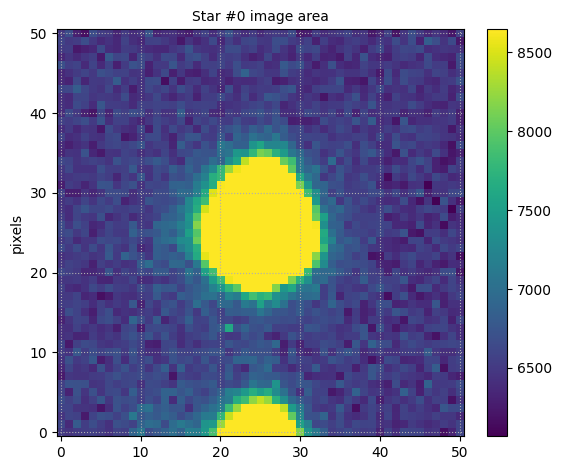

In [31]:
from astropy.nddata import Cutout2D

def plot_star_cutout(data, daofound, idx, cutsize=51):
  """
  Creates a cutout image around a detected star.

  Args:
      data: The 2D astronomical image data.
      daofound: A dictionary containing star detection results from DAOStarFinder.
      idx: The index of the star to plot.
      cutsize: The size (width and height) of the cutout image (default: 51 pixels).
  """

  # Extract star centroid coordinates
  xcentroid = daofound['xcentroid'][idx]
  ycentroid = daofound['ycentroid'][idx]

  # Create cutout object
  cut_hdu = Cutout2D(data=data, position=(xcentroid, ycentroid), size=(cutsize, cutsize))

  # Create and display the cutout image
  fig, ax = plt.subplots(1, 1)
  im = zimshow(ax, cut_hdu.data, origin='lower')

  ax.set_ylabel('pixels')
  ax.grid(ls=':')
  ax.set_title(f'Star #{idx} image area', fontsize=10)
  plt.colorbar(im, ax=ax, fraction=0.0455, pad=0.04)

  plt.tight_layout()
  plt.show()

# Example usage (assuming hdul and DAOfound are available)
plot_star_cutout(hdul[0].data, DAOfound, 0)  # Plot cutout for the first star (idx=0)

### 여러 별 display

원하는 4개의 별을 골라 display 해보겠습니다. 플럭스 순으로 sort 했기 때문에 index 번호가 클 수록 어두운 별이 나타날 것입니다.

/tmp/ipykernel_104271/3378664288.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


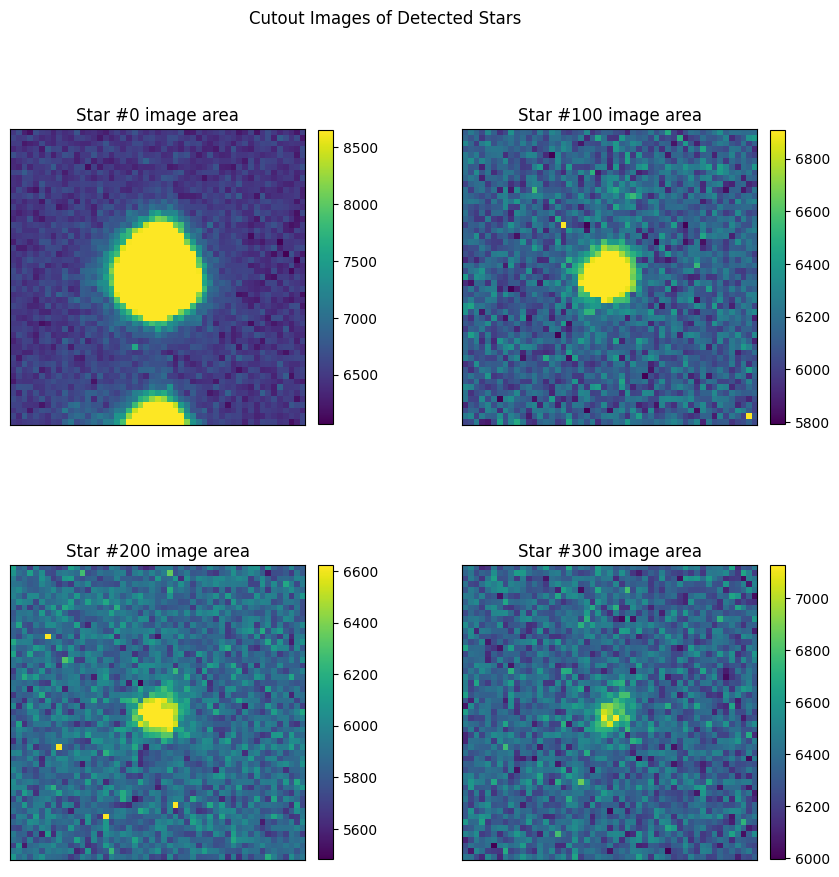

In [32]:
import matplotlib.gridspec as gridspec

def plot_star_cutouts(data, daofound, star_indices, cutsize=51):
    """
    4개의 별의 인덱스를 입력받아 해당 별들의 cutout 이미지를 출력하는 함수

    Args:
        data: 2차원 천문 이미지 데이터
        daofound: DAOStarFinder를 통해 얻은 별 검출 결과
        star_indices: 출력할 별들의 인덱스 리스트 (최대 4개)
        cutsize: cutout 이미지의 크기 (default: 51 pixels)
        figsize: 그림의 크기 (default: (12, 6))
    """
    plt.figure(figsize=(10, 10))
    # 출력할 별의 개수 제한 (최대 4개)
    nstars = min(len(star_indices), 4)

    # 그리드 생성
    gs = gridspec.GridSpec(2, 2, wspace=0.4, hspace=0.3)

    # 입력된 인덱스에 해당하는 별들의 cutout 이미지 생성 및 출력
    for i, idx in enumerate(star_indices):
        xcentroid = daofound['xcentroid'][idx]
        ycentroid = daofound['ycentroid'][idx]

        cut_hdu = Cutout2D(data=data, position=(xcentroid, ycentroid), size=(cutsize, cutsize))

        ax = plt.subplot(gs[i])
        im = zimshow(ax, cut_hdu.data, origin='lower')

        ax.set_title(f'Star #{idx} image area')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)
    # 각 subplot에 colorbar 추가
        plt.colorbar(im, ax=ax, fraction=0.0455, pad=0.04)

    plt.suptitle('Cutout Images of Detected Stars', fontsize=12)
    plt.tight_layout()
    plt.show()

# 예시 사용법 (hdul과 DAOfound가 있다고 가정)
plot_star_cutouts(hdul[0].data, DAOfound, [0, 100, 200, 300])  # 인덱스 0, 2, 3, 5에 해당하는 별 출력

### 3D plot

Star profile을 보기 위해서는 아래와 같이 3D plot을 해보면 좋을것이다.

NameError: name 'pl' is not defined

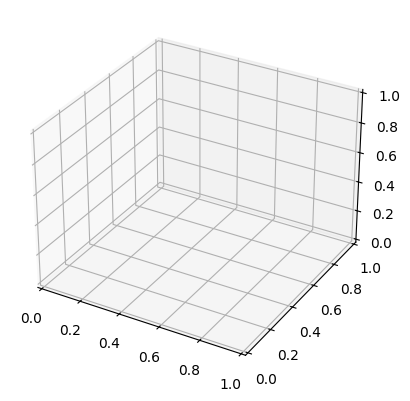

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D

def plot_3D_star_cutout(data, daofound, idx, cutsize=31):
    """
    Creates a cutout image around a detected star.

    Args:
    data: The 2D astronomical image data.
    daofound: A dictionary containing star detection results from DAOStarFinder.
    idx: The index of the star to plot.
    cutsize: The size (width and height) of the cutout image (default: 51 pixels).
    """

    # Extract star centroid coordinates
    xcentroid = daofound['xcentroid'][idx]
    ycentroid = daofound['ycentroid'][idx]

    # Create cutout object
    cut_hdu = Cutout2D(data=data, position=(xcentroid, ycentroid), size=(cutsize, cutsize))
    x, y = np.mgrid[:cut_hdu.data.shape[0],:cut_hdu.data.shape[1]]

    # 3D 플롯 생성
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Surface plot 생성
    im = ax.plot_surface(x, y, cut_hdu.data, rstride=1, cstride=1, linewidth=0, antialiased=False,
                cmap=pl.cm.jet,)

    ax.set_ylabel('pixels')
    ax.grid(ls=':')
    ax.set_title(f'Star #{idx} image area', fontsize=10)
    plt.colorbar(im, ax=ax, fraction=0.02, pad=0.08)

    plt.tight_layout()
    plt.show()

# Example usage (assuming hdul and DAOfound are available)
plot_3D_star_cutout(hdul[0].data, DAOfound, 0)  # Plot cutout for the first star (idx=0)

In [ ]:
len(DAOfound)

433

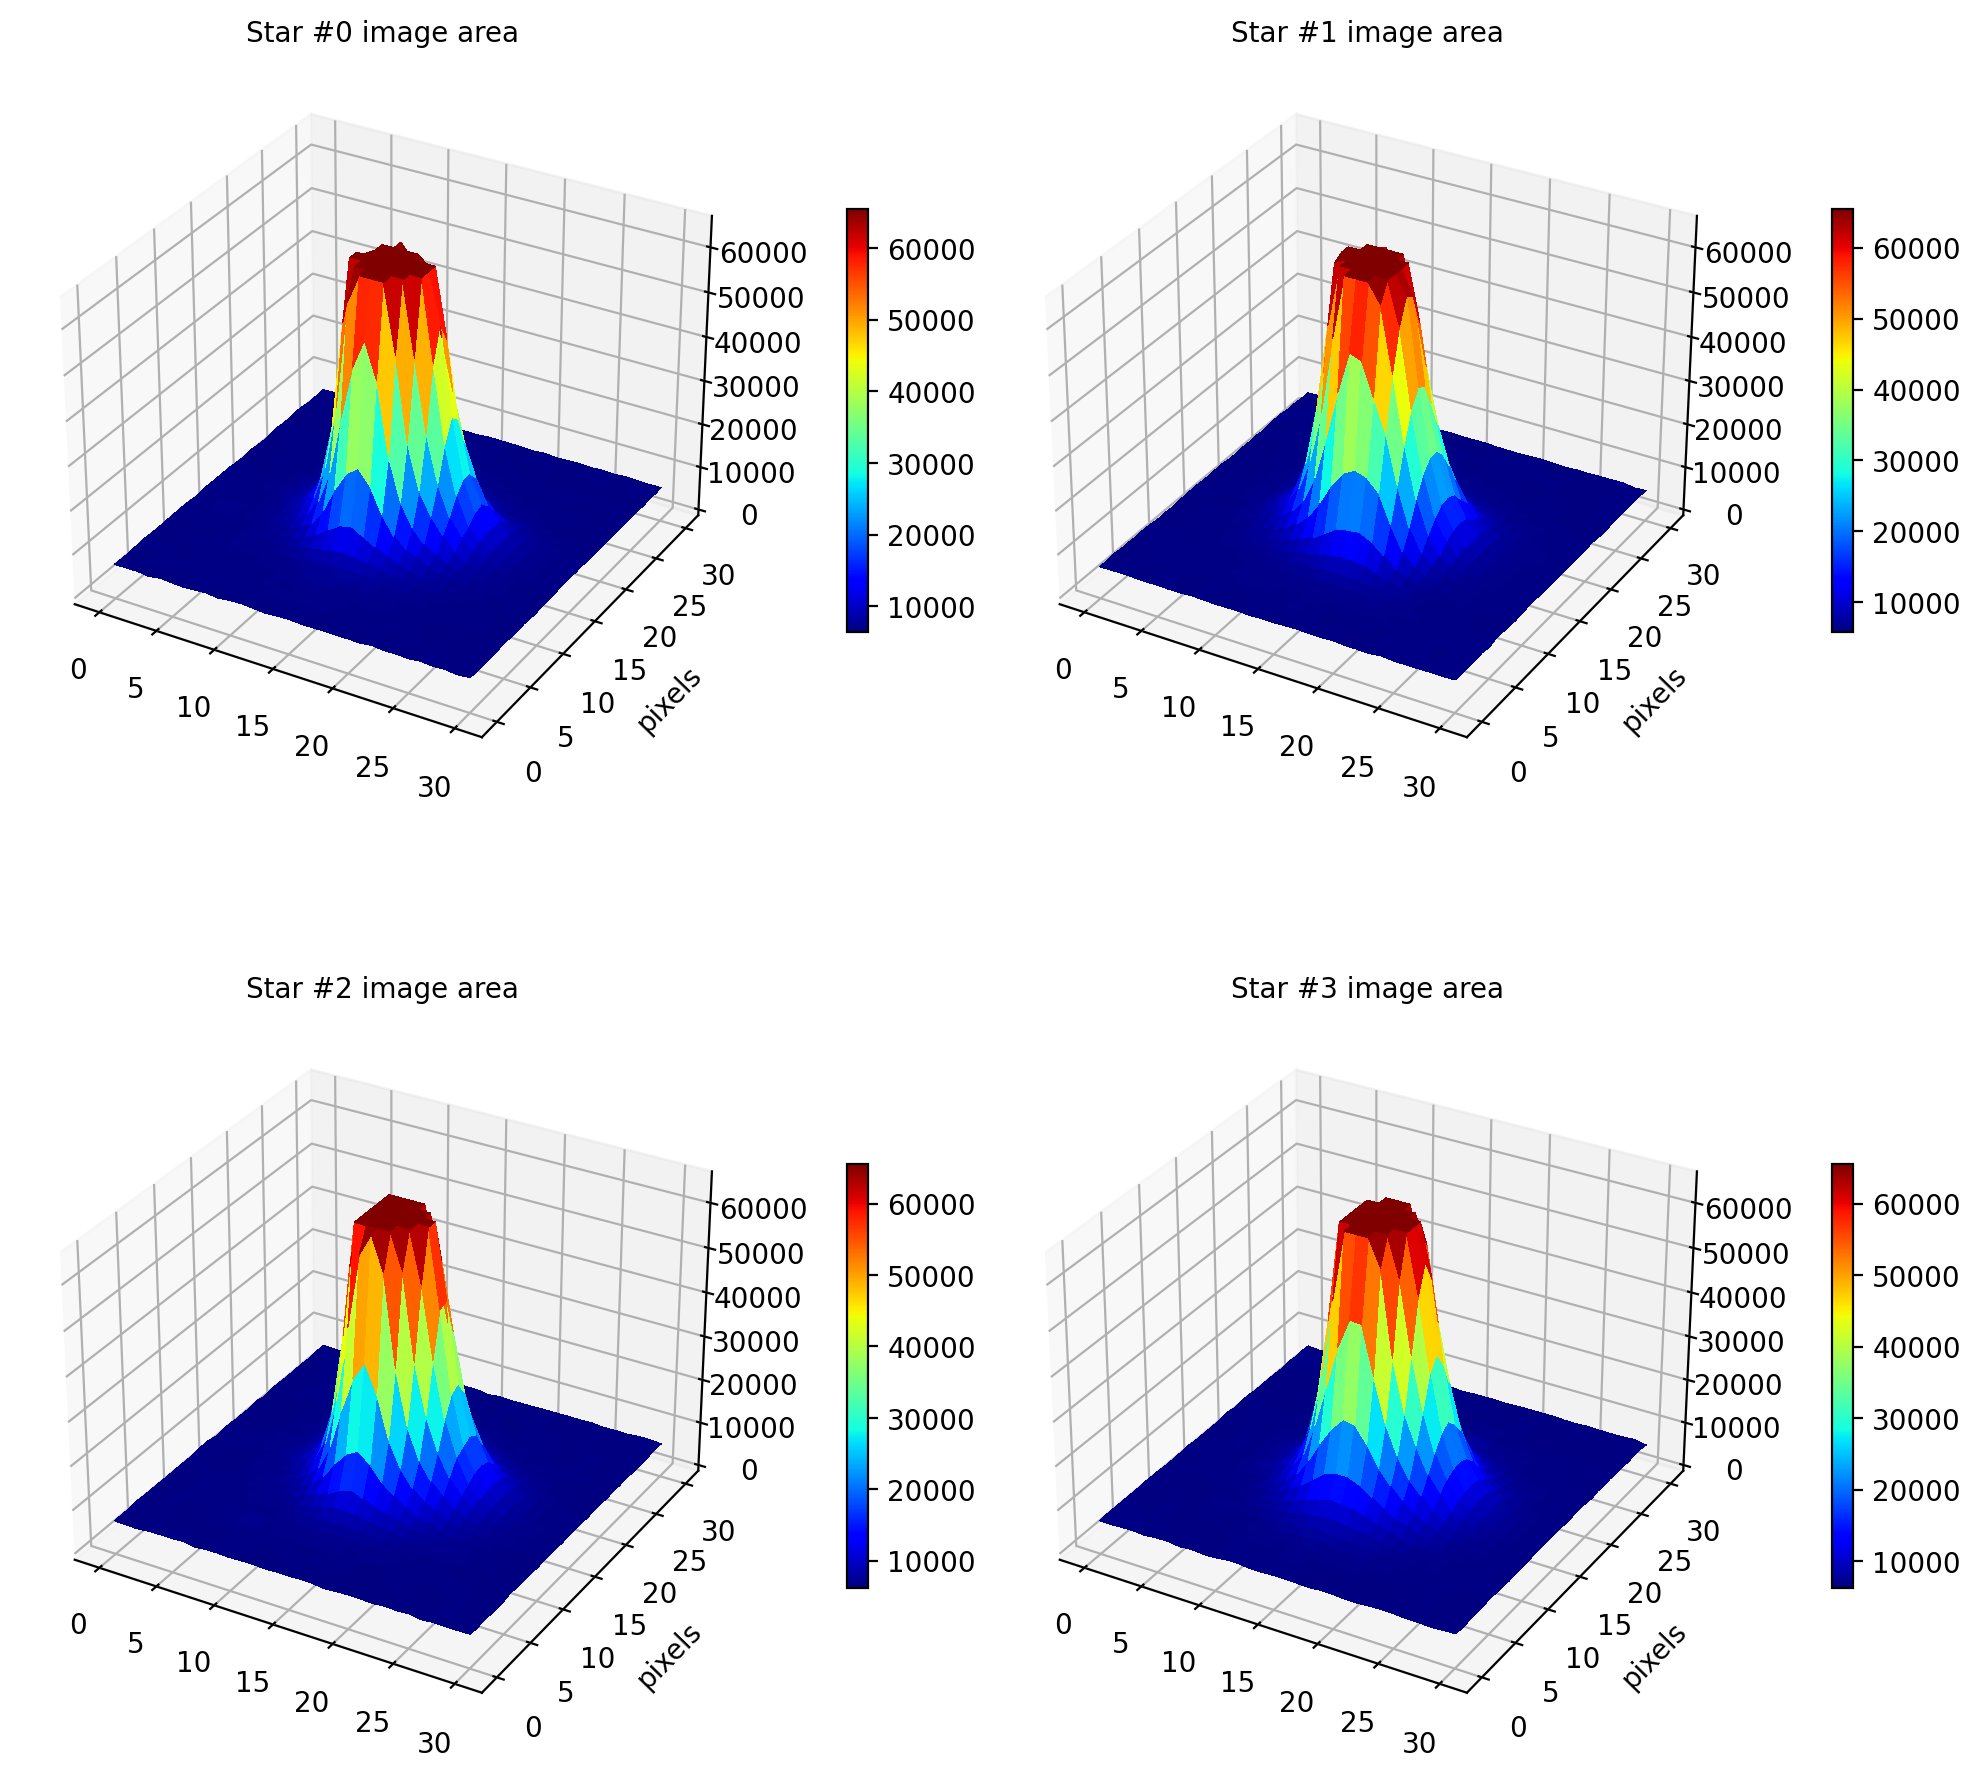

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D

def plot_3D_star_cutout(data, daofound, star_indices, cutsize=31):
    """
    Creates a cutout image around a detected star.

    Args:
    data: The 2D astronomical image data.
    daofound: A dictionary containing star detection results from DAOStarFinder.
    idx: The index of the star to plot.
    cutsize: The size (width and height) of the cutout image (default: 51 pixels).
    """

    fig, axes = plt.subplots(2, 2,
                             figsize=(10, 10),
                             subplot_kw={'projection': '3d'})
    axes = axes.flatten()

  # 입력된 인덱스에 해당하는 별들의 cutout 이미지 생성 및 출력
    for i, idx in enumerate(star_indices):
        xcentroid = daofound['xcentroid'][idx]
        ycentroid = daofound['ycentroid'][idx]

        # Create cutout object
        cut_hdu = Cutout2D(data=data, position=(xcentroid, ycentroid), size=(cutsize, cutsize))
        x, y = np.mgrid[:cut_hdu.data.shape[0],:cut_hdu.data.shape[1]]

        # Surface plot 생성
        axes[i].plot_surface(x, y, cut_hdu.data, rstride=1, cstride=1, linewidth=0, antialiased=False,
                        cmap=pl.cm.jet)

        im = axes[i].plot_surface(x, y, cut_hdu.data, rstride=1, cstride=1, linewidth=0, antialiased=False,
                    cmap=pl.cm.jet,)
        axes[i].set_zlim(0, 65535)
        axes[i].set_ylabel('pixels')
        axes[i].grid(ls=':')
        axes[i].set_title(f'Star #{idx} image area', fontsize=10)
        plt.colorbar(im, ax=axes[i], fraction=0.025, pad=0.12)

    plt.tight_layout()
    plt.show()

# Example usage (assuming hdul and DAOfound are available)
plot_3D_star_cutout(hdul[0].data, DAOfound, [0, 1, 2, 3])

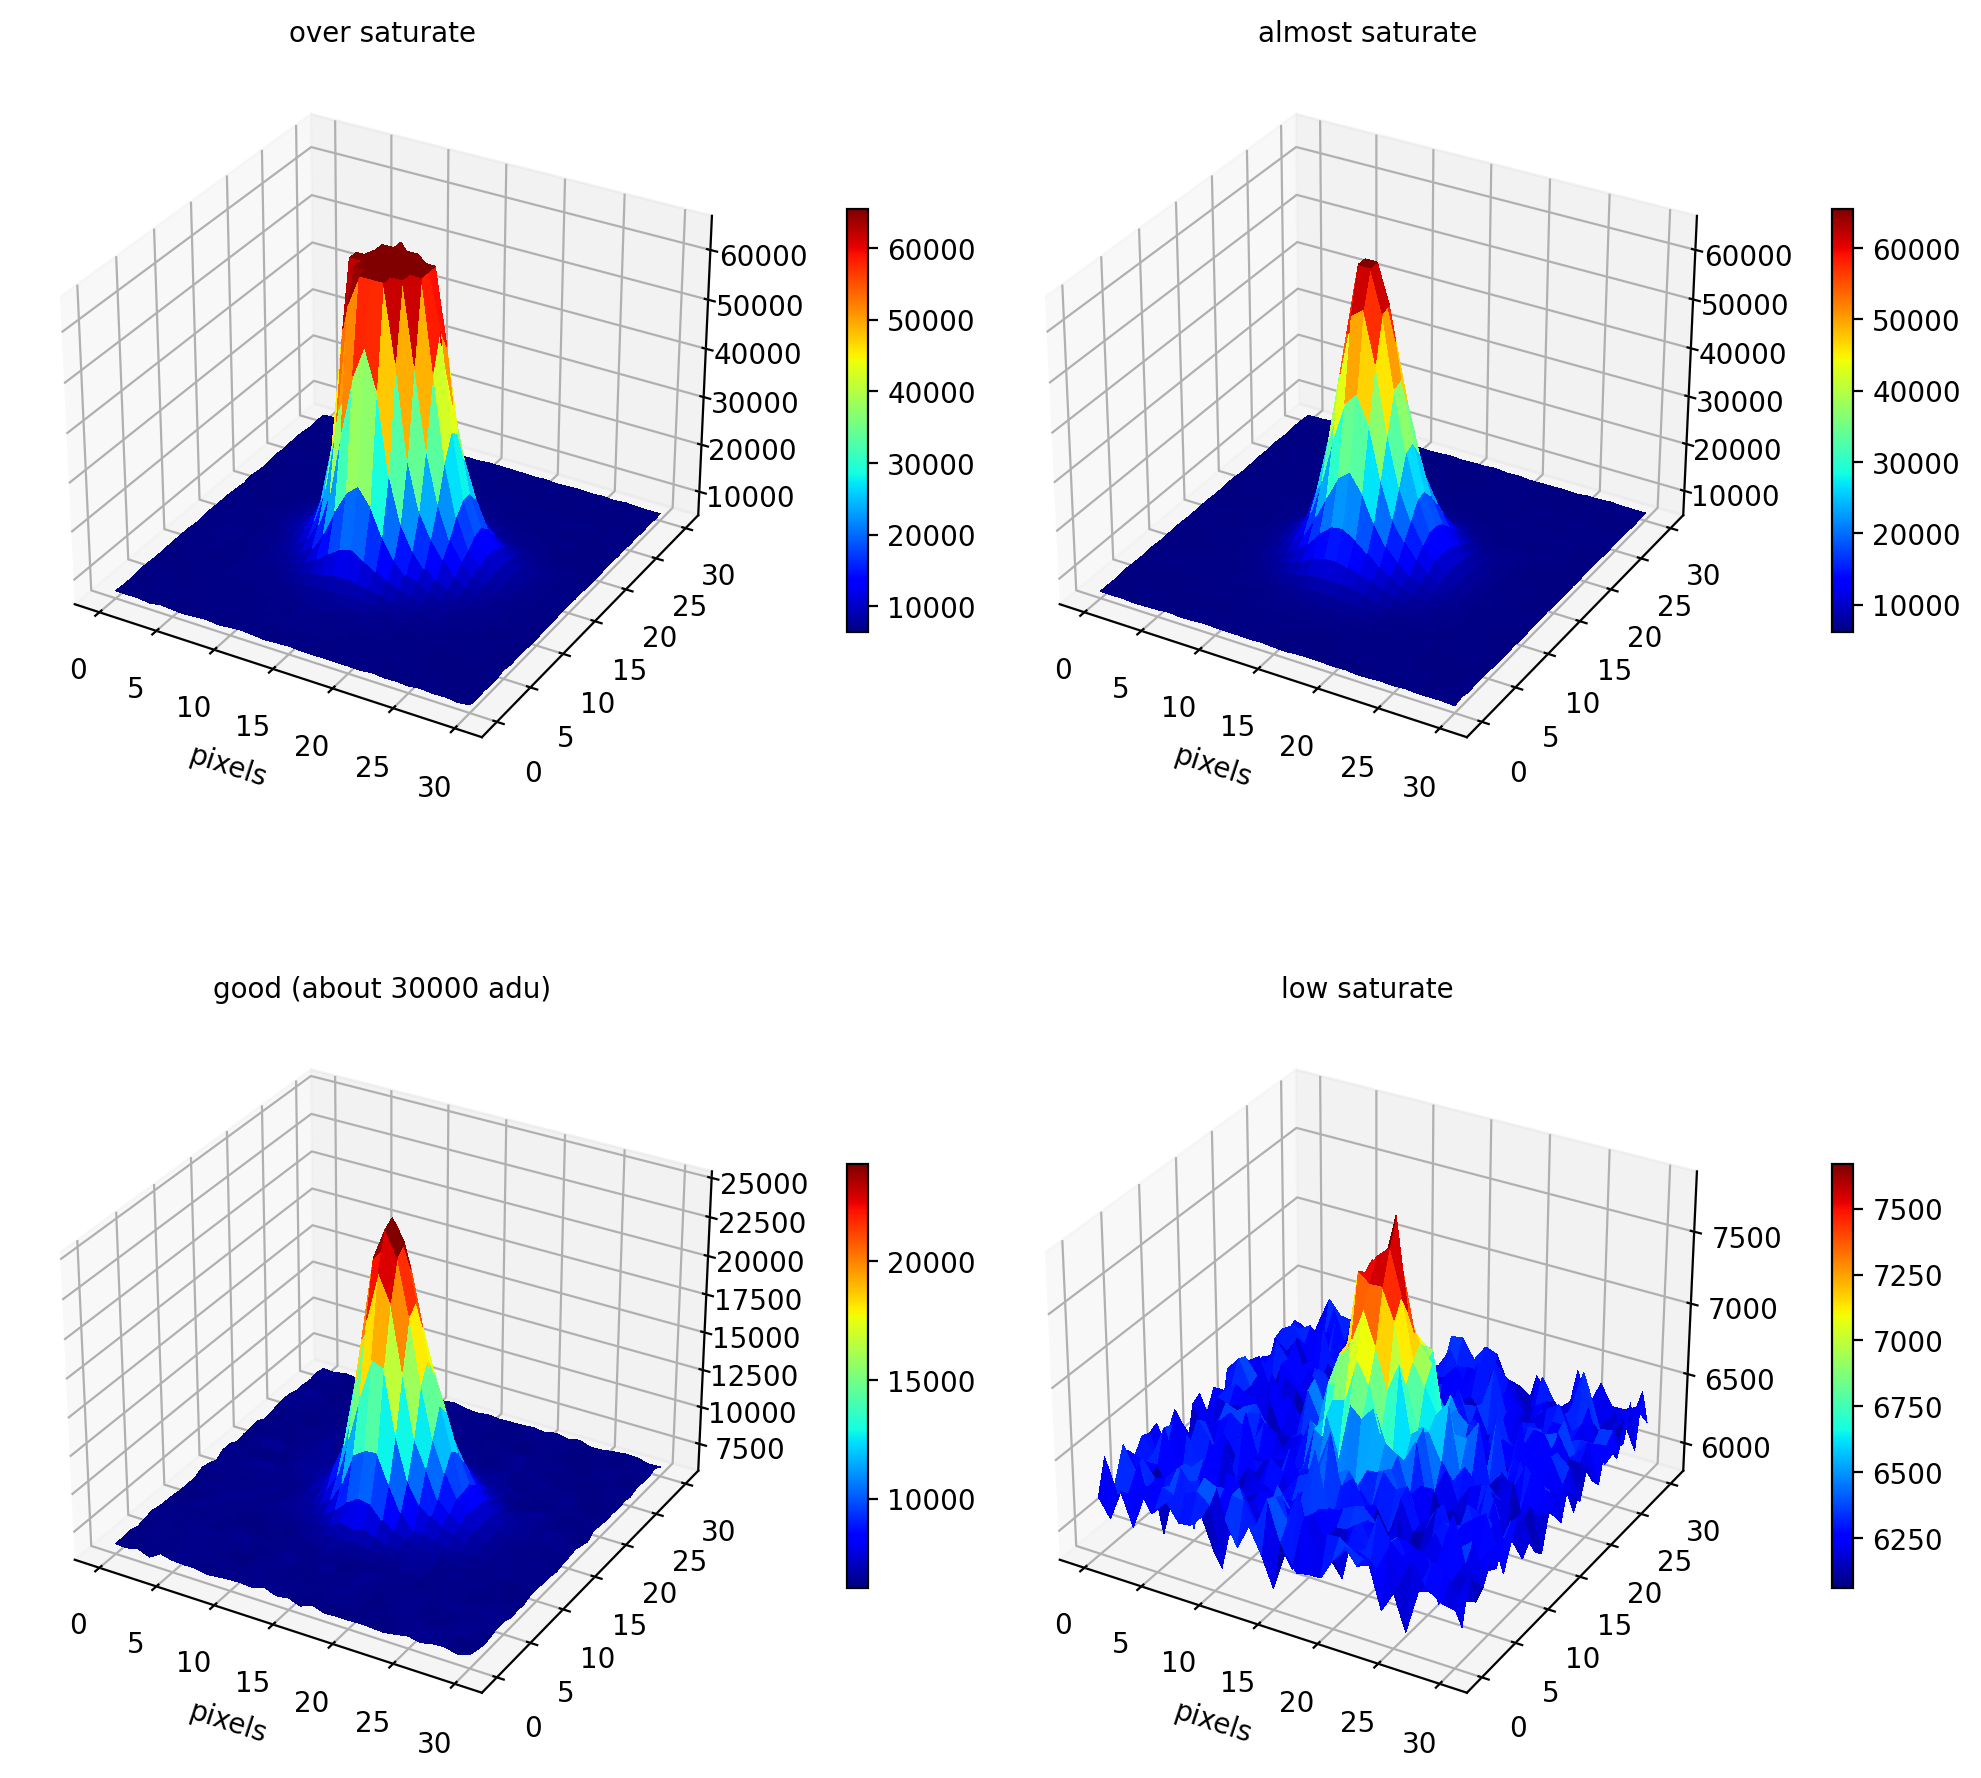

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pylab as pl
from astropy.nddata import Cutout2D
from astropy.io import fits

def plot_3d_surfaces(data, DAOfound, cutsize=31):
    fig = plt.figure(figsize=(10, 10))

    positions = [
        (0, 'over saturate'),
        (12, 'almost saturate'),
        (25, 'good (about 30000 adu)'),
        (175, 'low saturate')
    ]

    for i, (index, title) in enumerate(positions):
        ax = fig.add_subplot(2, 2, i+1, projection='3d')

        cut_hdu = Cutout2D(
            data=data,
            position=(DAOfound['xcentroid'][index], DAOfound['ycentroid'][index]),
            size=(cutsize, cutsize)
        )

        x, y = np.mgrid[:cut_hdu.data.shape[0], :cut_hdu.data.shape[1]]
        im = ax.plot_surface(x, y, cut_hdu.data, cmap=pl.cm.jet,
                             rstride=1, cstride=1, linewidth=0., antialiased=False)

        ax.set_xlabel('pixels')
        ax.grid(ls=':')
        ax.set_title(title, fontsize=10)
        plt.colorbar(im, ax=ax, fraction=0.025, pad=0.12)

    plt.tight_layout()
    plt.show()

# 함수 사용 예:
plot_3d_surfaces(hdul[0].data, DAOfound)